In [155]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [156]:
Data = pd.read_csv('Ruter_data_fix.csv',names=['TurID', 'Dato', 'Fylke', 'Område', 'Kommune', 'Holdeplass_Fra', 'Holdeplass_Til', 'Linjetype', 'Linjefylke', 'Linjenavn', 'Linjeretning', 'Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra', 'Tidspunkt_Faktisk_Avgang_Holdeplass_Fra', 'Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra', 'Tidspunkt_Planlagt_Avgang_Holdeplass_Fra', 'Kjøretøy_Kapasitet', 'Passasjerer_Ombord'])
Data.head()

,TurID,Dato,Fylke,Område,Kommune,Holdeplass_Fra,Holdeplass_Til,Linjetype,Linjefylke,Linjenavn,Linjeretning,Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra,Tidspunkt_Faktisk_Avgang_Holdeplass_Fra,Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra,Tidspunkt_Planlagt_Avgang_Holdeplass_Fra,Kjøretøy_Kapasitet,Passasjerer_Ombord
0,15006-2020-08-10T10:24:00+02:00,10/08/2020,Viken,Vest,Bærum,Nordliveien,Tjernsmyr,Lokal,Viken,150,0,10:53:53,10:53:59,10:53:00,10:53:00,112,5
1,15002-2020-08-15T12:54:00+02:00,15/08/2020,Viken,Vest,Bærum,Nadderud stadion,Bekkestua bussterminal (Plattform C),Lokal,Viken,150,0,13:12:20,13:12:26,13:12:00,13:12:00,112,5
2,15004-2020-08-03T09:54:00+02:00,03/08/2020,Viken,Vest,Bærum,Ringstabekkveien,Skallum,Lokal,Viken,150,0,10:18:56,10:19:21,10:19:00,10:19:00,112,6
3,15003-2020-07-27T13:00:00+02:00,27/07/2020,Viken,Vest,Bærum,Gruvemyra,Gullhaug,Lokal,Viken,150,1,13:52:04,13:52:26,13:51:00,13:51:00,112,10
4,15002-2020-08-27T07:15:00+02:00,27/08/2020,Viken,Vest,Bærum,Lysaker stasjon (Plattform A),Tjernsmyr,Lokal,Viken,150,1,07:34:13,07:34:53,07:33:00,07:33:00,112,10


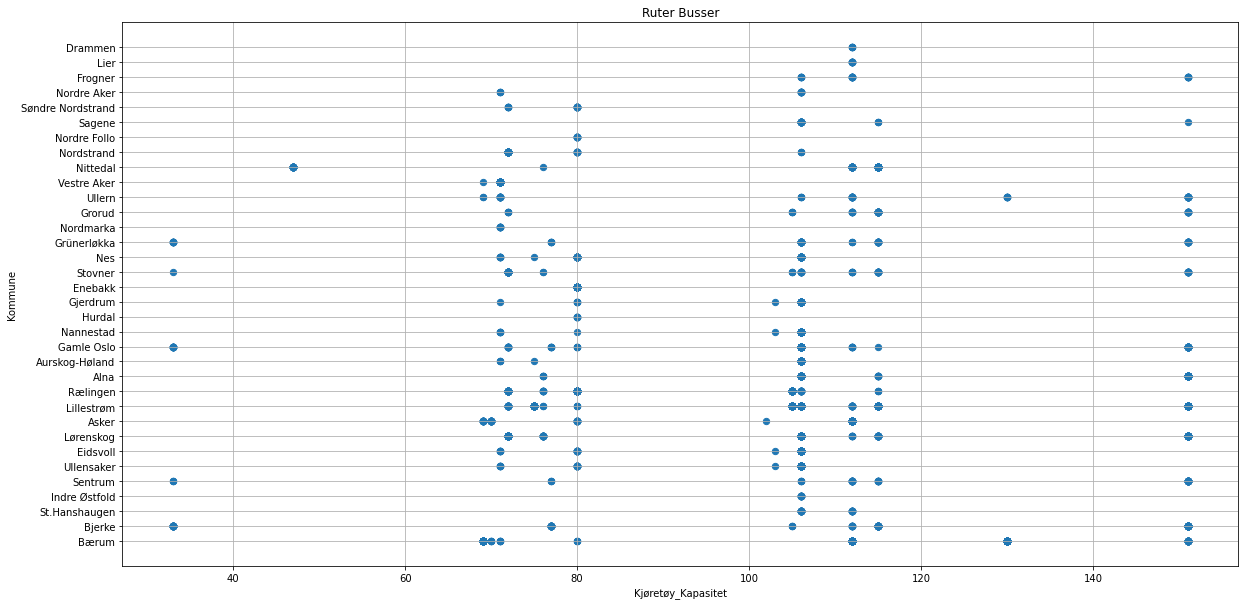

In [157]:
Data.plot.scatter(x='Kjøretøy_Kapasitet', y='Kommune', figsize=(20,10), s=40, title='Ruter Busser')
plt.grid()

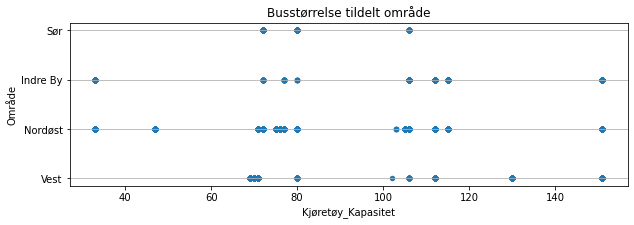

In [158]:
Data.plot.scatter(x='Kjøretøy_Kapasitet', y='Område', figsize=(10,3), title='Busstørrelse tildelt område')
plt.grid(axis='y')

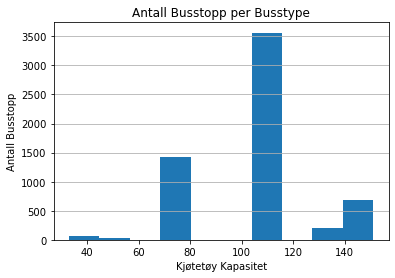

In [159]:
Data['Kjøretøy_Kapasitet'].plot.hist(title = 'Antall Busstopp per Busstype')
plt.xlabel('Kjøtetøy Kapasitet')
plt.ylabel('Antall Busstopp')
plt.grid(axis='y')

In [160]:
Sør_Data = Data[(Data['Område'] == 'Sør')]
Vest_Data = Data[(Data['Område'] == 'Vest')]
IndreBy_Data = Data[(Data['Område'] == 'Indre By')]
Nordøst_Data = Data[(Data['Område'] == 'Nordøst')]

print('Sør:     ', Sør_Data.shape)
print('Vest:    ', Vest_Data.shape)
print('Indre By:', IndreBy_Data.shape)
print('Nordøst: ', Nordøst_Data.shape)

Sør:      (309, 17)
Vest:     (1307, 17)
Indre By: (572, 17)
Nordøst:  (3812, 17)


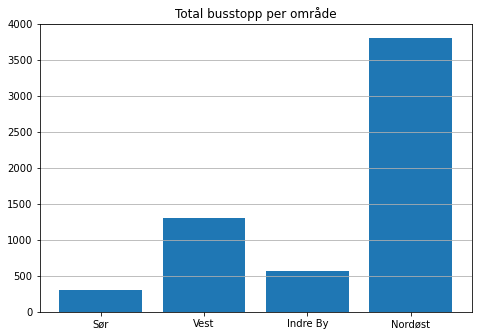

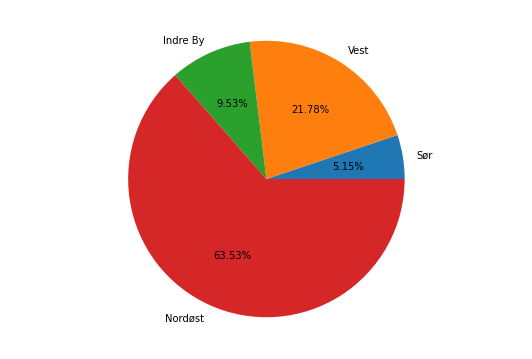

In [161]:
Sør_Stop = Sør_Data.shape[0]
Vest_Stop = Vest_Data.shape[0]
IndreBy_Stop = IndreBy_Data.shape[0]
Nordøst_Stop = Nordøst_Data.shape[0]

# Søylediagram
Område = ['Sør', 'Vest', 'Indre By', 'Nordøst']
busstopp = [Sør_Stop, Vest_Stop, IndreBy_Stop, Nordøst_Stop]
plt.figure().add_axes([0,0,1,1]).bar(Område, busstopp)
plt.grid(axis='y')
plt.title('Total busstopp per område')

# Kakediagram
ax = plt.figure().add_axes([0,0,1.2,1.2])
ax.axis('equal')
ax.pie(busstopp, labels = Område, autopct='%1.2f%%')
plt.show()

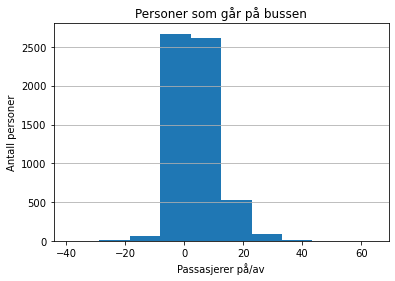

In [162]:
Data['Passasjerer_Ombord'].plot.hist(title = 'Personer som går på bussen')
plt.xlabel('Passasjerer på/av')
plt.ylabel('Antall personer')
plt.grid(axis='y')